# IMPORTAÇÃO DE DAODS E PRIMEIRAS VISUALIZAÇÕES

In [1]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('Loan.csv',thousands= " ")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
import time
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [2]:
df.head(3)

,Unnamed: 0,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1,high_interest_rate,senior_age
0,126324,151214,2019,ncf,Male,nopre,type1,p3,l1,nopc,nob/c,986500,4.125,0.6174,9825.00,360.0,neg_amm,not_int,not_lpsm,1408000.0,sb,pr,home,1U,13380.0,CIB,864,EXP,35-44,to_inst,70.063920,North,direct,0,42.0,1,0
1,13385,38275,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,406500,3.625,-0.1990,1100.00,360.0,not_neg,not_int,not_lpsm,1008000.0,sb,pr,home,1U,5640.0,CRIF,505,EXP,>74,not_inst,40.327381,North,direct,0,40.0,0,1
2,98606,123496,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,166500,4.250,0.7779,2379.51,180.0,not_neg,not_int,not_lpsm,338000.0,sb,pr,home,1U,4740.0,CRIF,829,CIB,55-64,to_inst,49.260355,south,direct,0,29.0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   credit_worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           148670 non-null  float64
 13  interest_rate_spread       11

In [4]:
df.shape

(148670, 37)

# TRADUÇÃO DA BASE DE DADOS

In [5]:
df_traduzida = df.rename(columns={
    'loan_limit':'LimiteEmpréstimo',
    'gender':'Sexo',
    'approv_in_adv':'EmprestimoFoi',
    'loan_type':'TipoEmpréstimo',
    'loan_purpose':'FinalidadeEmpréstimo',
    'credit_worthiness':'CapacidadeCrédito',
    'open_credit':'CréditoAberto',
    'business_or_commercial':'NegócioOuComercial',
    'loan_amount':'ValorEmpréstimo',
    'rate_of_interest':'Juros',  
    'interest_rate_spread':'SpreadJuros',
    'interest_rate_spread':'SpreadJuros',
    'upfront_charges':'CobrançasIniciais',
    'term':'Mandato',
    'neg_ammortization':'AmortizaçãoNegativa',
    'lump_sum_payment':'PagamentoÚnico',
    'property_value':'ValorPropriedade',
    'construction_type':'TipoConstrução',
    'occupancy_type':'TipoOcupação',
    'secured_by':'Garantidos',
    'total_units':'UnidadesTotal',
    'income':'Renda',
    'credit_type':'TipoCrédito',
    'credit_score':'PontuaçãoCrédito',
    'co-applicant_credit_type':'CréditoRequerente',
    'age':'Anos',
    'submission_of_application':'SubmissãoCandidatura',
    'region':'Região',
    'security_type':'TipoSegurança',
    'high_interest_rate':'AltosJuros',
    'senior_age':'IdadeAvançada'
    
})


In [6]:
df_traduzida.head()

,Unnamed: 0,id,year,LimiteEmpréstimo,Sexo,EmprestimoFoi,TipoEmpréstimo,FinalidadeEmpréstimo,CapacidadeCrédito,CréditoAberto,NegócioOuComercial,ValorEmpréstimo,Juros,SpreadJuros,CobrançasIniciais,Mandato,AmortizaçãoNegativa,interest_only,PagamentoÚnico,ValorPropriedade,TipoConstrução,TipoOcupação,Garantidos,UnidadesTotal,Renda,TipoCrédito,PontuaçãoCrédito,CréditoRequerente,Anos,SubmissãoCandidatura,ltv,Região,TipoSegurança,status,dtir1,AltosJuros,IdadeAvançada
0,126324,151214,2019,ncf,Male,nopre,type1,p3,l1,nopc,nob/c,986500,4.125,0.6174,9825.00,360.0,neg_amm,not_int,not_lpsm,1408000.0,sb,pr,home,1U,13380.0,CIB,864,EXP,35-44,to_inst,70.063920,North,direct,0,42.0,1,0
1,13385,38275,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,406500,3.625,-0.1990,1100.00,360.0,not_neg,not_int,not_lpsm,1008000.0,sb,pr,home,1U,5640.0,CRIF,505,EXP,>74,not_inst,40.327381,North,direct,0,40.0,0,1
2,98606,123496,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,166500,4.250,0.7779,2379.51,180.0,not_neg,not_int,not_lpsm,338000.0,sb,pr,home,1U,4740.0,CRIF,829,CIB,55-64,to_inst,49.260355,south,direct,0,29.0,1,1
3,7184,32074,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,206500,5.625,1.1174,6117.50,360.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,3780.0,EXP,763,CIB,35-44,to_inst,74.280576,North,direct,0,44.0,1,0
4,120745,145635,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,166500,3.500,0.1533,779.88,360.0,not_neg,not_int,not_lpsm,168000.0,sb,pr,home,1U,2400.0,CIB,886,CIB,35-44,not_inst,99.107143,North,direct,0,42.0,0,0


# TRATAMENTO E MANIPULAÇÃO DE DADOS 

In [7]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            148670 non-null  int64  
 1   id                    148670 non-null  int64  
 2   year                  148670 non-null  int64  
 3   LimiteEmpréstimo      145326 non-null  object 
 4   Sexo                  148670 non-null  object 
 5   EmprestimoFoi         147762 non-null  object 
 6   TipoEmpréstimo        148670 non-null  object 
 7   FinalidadeEmpréstimo  148536 non-null  object 
 8   CapacidadeCrédito     148670 non-null  object 
 9   CréditoAberto         148670 non-null  object 
 10  NegócioOuComercial    148670 non-null  object 
 11  ValorEmpréstimo       148670 non-null  int64  
 12  Juros                 148670 non-null  float64
 13  SpreadJuros           112031 non-null  float64
 14  CobrançasIniciais     109028 non-null  float64
 15  

In [8]:
# EXCLUIT COLUNAS QUE NÃO SERÃO ÚTEIS

del df_traduzida['Unnamed: 0']
del df_traduzida['id']
del df_traduzida['dtir1']
del df_traduzida['interest_only']

### TRATANDO VALORES NULOS E VALORES DUPLICADOS 

In [9]:
(df_traduzida.isnull().sum() / len(df_traduzida['Sexo']))*100

year                     0.000000
LimiteEmpréstimo         2.249277
Sexo                     0.000000
EmprestimoFoi            0.610749
TipoEmpréstimo           0.000000
FinalidadeEmpréstimo     0.090133
CapacidadeCrédito        0.000000
CréditoAberto            0.000000
NegócioOuComercial       0.000000
ValorEmpréstimo          0.000000
Juros                    0.000000
SpreadJuros             24.644515
CobrançasIniciais       26.664425
Mandato                  0.027578
AmortizaçãoNegativa      0.081388
PagamentoÚnico           0.000000
ValorPropriedade        10.155378
TipoConstrução           0.000000
TipoOcupação             0.000000
Garantidos               0.000000
UnidadesTotal            0.000000
Renda                    6.154571
TipoCrédito              0.000000
PontuaçãoCrédito         0.000000
CréditoRequerente        0.000000
Anos                     0.134526
SubmissãoCandidatura     0.134526
ltv                     10.155378
Região                   0.000000
TipoSegurança 

In [10]:
media = df_traduzida['ltv'].mean()
df_traduzida['ltv'] = df_traduzida['ltv'].fillna(media)

In [11]:
med = df_traduzida['SpreadJuros'].mean()
df_traduzida['SpreadJuros'] = df_traduzida['SpreadJuros'].fillna(med)

In [12]:
medi = df_traduzida['CobrançasIniciais'].mean()
df_traduzida['CobrançasIniciais'] = df_traduzida['CobrançasIniciais'].fillna(medi)

In [13]:
mee = df_traduzida['ValorPropriedade'].mean()
df_traduzida['ValorPropriedade'] = df_traduzida['ValorPropriedade'].fillna(mee)

In [14]:
me = df_traduzida['CobrançasIniciais'].mean()
df_traduzida['CobrançasIniciais'] = df_traduzida['CobrançasIniciais'].fillna(me)

In [15]:
m = df_traduzida['Renda'].mean()
df_traduzida['Renda'] = df_traduzida['Renda'].fillna(m)

In [16]:

valor_mais_comum = df_traduzida['FinalidadeEmpréstimo'].mode()[0]

# Preenchendo os valores nulos com a moda
df_traduzida['FinalidadeEmpréstimo'].fillna(valor_mais_comum, inplace=True)


In [17]:

valor_mais_comumm = df_traduzida['AmortizaçãoNegativa'].mode()[0]

# Preenchendo os valores nulos com a moda
df_traduzida['AmortizaçãoNegativa'].fillna(valor_mais_comumm, inplace=True)


In [18]:

valor = df_traduzida['EmprestimoFoi'].mode()[0]

# Preenchendo os valores nulos com a moda
df_traduzida['EmprestimoFoi'].fillna(valor, inplace=True)

In [19]:
valor_mais = df_traduzida['SubmissãoCandidatura'].mode()[0]

# Preenchendo os valores nulos com a moda
df_traduzida['SubmissãoCandidatura'].fillna(valor_mais, inplace=True)


In [20]:
valor_mai = df_traduzida['Anos'].mode()[0]

# Preenchendo os valores nulos com a moda
df_traduzida['Anos'].fillna(valor_mai, inplace=True)

In [21]:
valor_ma = df_traduzida['Mandato'].mode()[0]

# Preenchendo os valores nulos com a moda
df_traduzida['Mandato'].fillna(valor_ma, inplace=True)


In [22]:
valor_m = df_traduzida['LimiteEmpréstimo'].mode()[0]

# Preenchendo os valores nulos com a moda
df_traduzida['LimiteEmpréstimo'].fillna(valor_m, inplace=True)

In [23]:
df_traduzida = df_traduzida.drop_duplicates()

# ANÁLISE EXPLORATÓRIA

### ESTATÍSTICA

In [24]:
df_traduzida.describe()

,year,ValorEmpréstimo,Juros,SpreadJuros,CobrançasIniciais,Mandato,ValorPropriedade,Renda,PontuaçãoCrédito,ltv,status,AltosJuros,IdadeAvançada
count,148669.0,1.486690e+05,148669.000000,148669.000000,148669.000000,148669.000000,1.486690e+05,148669.000000,148669.000000,148669.000000,148669.000000,148669.000000,148669.000000
mean,2019.0,3.311184e+05,2.808856,0.441656,3224.996127,335.143271,4.978951e+05,6957.364687,699.789284,72.746305,0.246440,0.333688,0.406628
std,0.0,1.839098e+05,2.224422,0.445361,2784.142648,58.402649,3.411701e+05,6293.505301,115.876225,37.883921,0.430939,0.471531,0.491206
min,2019.0,1.650000e+04,-1.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,0.000000,0.000000
25%,2019.0,1.965000e+05,2.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,0.000000,0.000000
50%,2019.0,2.965000e+05,3.750000,0.441656,3224.996127,360.000000,4.580000e+05,6000.000000,699.000000,73.026316,0.000000,0.000000,0.000000
75%,2019.0,4.365000e+05,4.250000,0.620000,3889.520000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,1.000000,1.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,1.000000,1.000000


### MODA

In [25]:
from statistics import mode

mode(df_traduzida['ValorEmpréstimo'])

206500

In [26]:
mode(df_traduzida['Juros'])

-1.0

In [27]:
mode(df_traduzida['SpreadJuros'])

0.4416556604868296

In [28]:
mode(df_traduzida['CobrançasIniciais'])

3224.9961265913353

In [29]:
mode(df_traduzida['Mandato'])

360.0

In [30]:
mode(df_traduzida['ValorPropriedade'])

497893.46569640347

In [31]:
mode(df_traduzida['Renda'])

6957.338876146789

In [32]:
mode(df_traduzida['PontuaçãoCrédito'])

763

In [33]:
mode(df_traduzida['IdadeAvançada'])

0

### ASSIMETRIA

In [34]:
df_traduzida['ValorEmpréstimo'].skew()

1.666987473651818

In [35]:
df_traduzida['Juros'].skew()

-1.0158694419768457

In [36]:
df_traduzida['SpreadJuros'].skew()

0.3234286655581671

In [37]:
df_traduzida['CobrançasIniciais'].skew()

2.0482733814734386

In [38]:
df_traduzida['ValorEmpréstimo'].skew()

1.666987473651818

In [39]:
df_traduzida['Mandato'].skew()

-2.1752782380060984

In [40]:
df_traduzida['Renda'].skew()

17.86620411627512

In [41]:
df_traduzida['PontuaçãoCrédito'].skew()

0.004762161409658643

In [42]:
df_traduzida['IdadeAvançada'].skew()

0.38017903614463255

### CURTOSE

In [43]:
df_traduzida['ValorEmpréstimo'].kurt()

9.127713320338396

In [44]:
df_traduzida['Juros'].kurt()

-0.7110657055558014

In [45]:
df_traduzida['SpreadJuros'].kurt()

0.7375098909221389

In [46]:
df_traduzida['CobrançasIniciais'].kurt()

9.774764255218999

In [47]:
df_traduzida['ValorEmpréstimo'].kurt()

9.127713320338396

In [48]:
df_traduzida['Mandato'].kurt()

3.1753010573469225

In [49]:
df_traduzida['Renda'].kurt()

943.5444455767661

In [50]:
df_traduzida['PontuaçãoCrédito'].kurt()

-1.2026602896837821

In [51]:
df_traduzida['IdadeAvançada'].kurt()

-1.8554888619989163

### HISTOGRAMA

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'ValorEmpréstimo'}>,
        <Axes: title={'center': 'Juros'}>,
        <Axes: title={'center': 'SpreadJuros'}>],
       [<Axes: title={'center': 'CobrançasIniciais'}>,
        <Axes: title={'center': 'Mandato'}>,
        <Axes: title={'center': 'ValorPropriedade'}>,
        <Axes: title={'center': 'Renda'}>],
       [<Axes: title={'center': 'PontuaçãoCrédito'}>,
        <Axes: title={'center': 'ltv'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'AltosJuros'}>],
       [<Axes: title={'center': 'IdadeAvançada'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

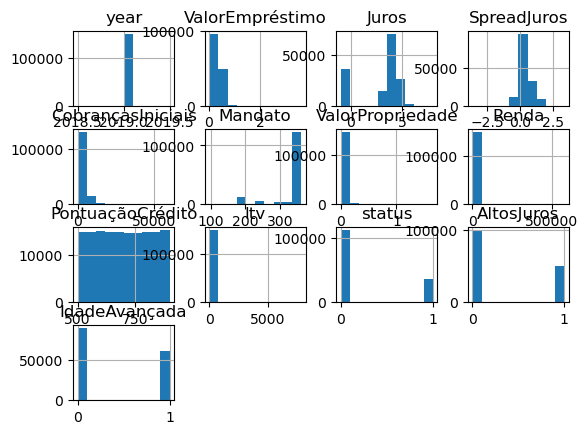

In [52]:
df_traduzida.hist()

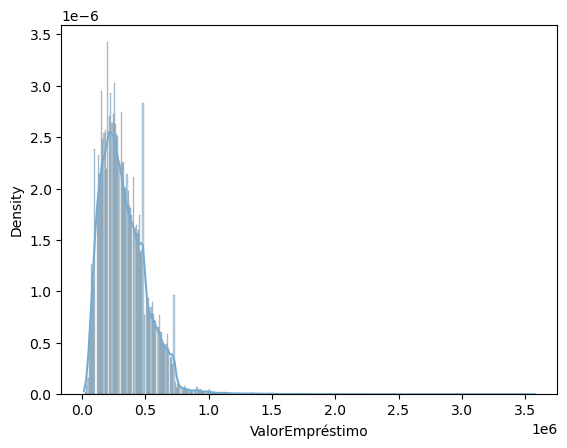

In [53]:
ax = sns.histplot(df_traduzida.ValorEmpréstimo, stat="density", kde=True, color='#74acd4', lw=1)

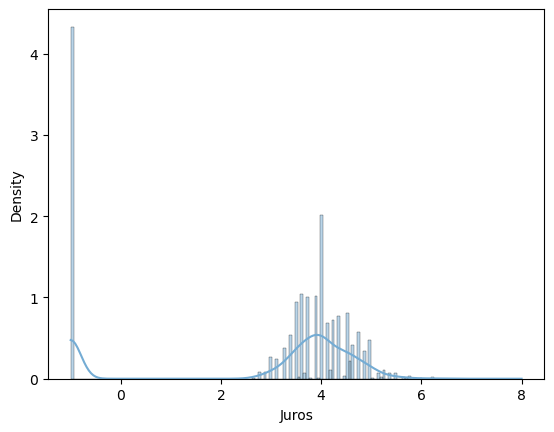

In [54]:
ax = sns.histplot(df_traduzida.Juros, stat="density", kde=True, color='#74acd4', lw=1)

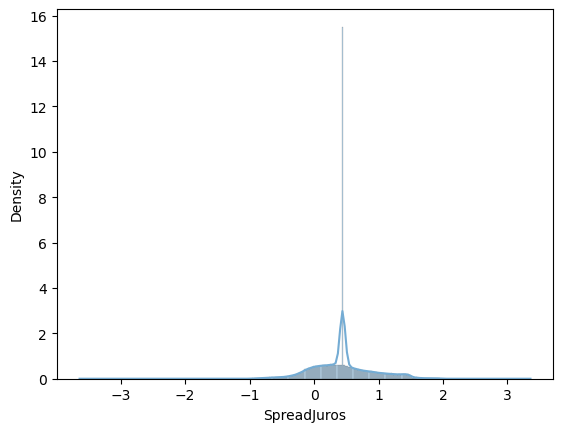

In [55]:
ax = sns.histplot(df_traduzida.SpreadJuros, stat="density", kde=True, color='#74acd4', lw=1)

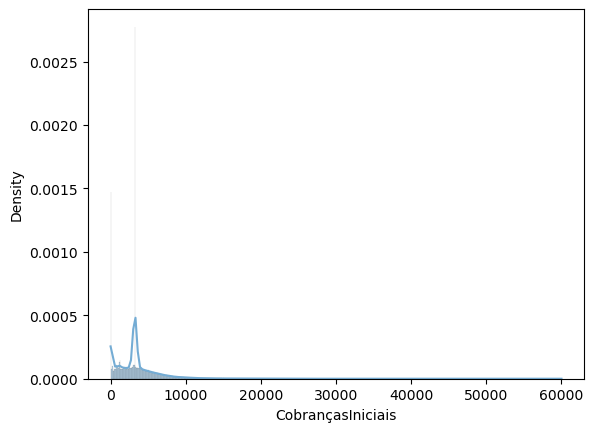

In [56]:
ax = sns.histplot(df_traduzida.CobrançasIniciais, stat="density", kde=True, color='#74acd4', lw=1)

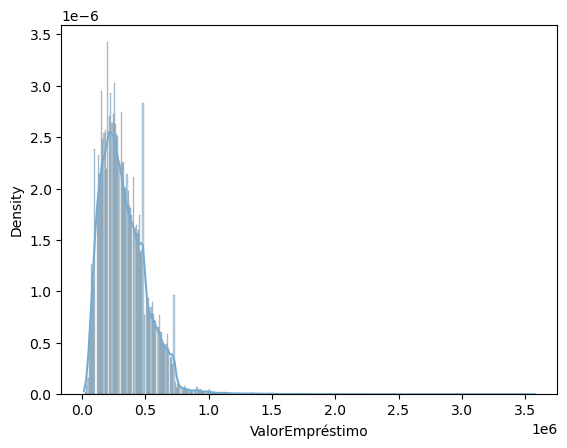

In [57]:
ax = sns.histplot(df_traduzida.ValorEmpréstimo, stat="density", kde=True, color='#74acd4', lw=1)

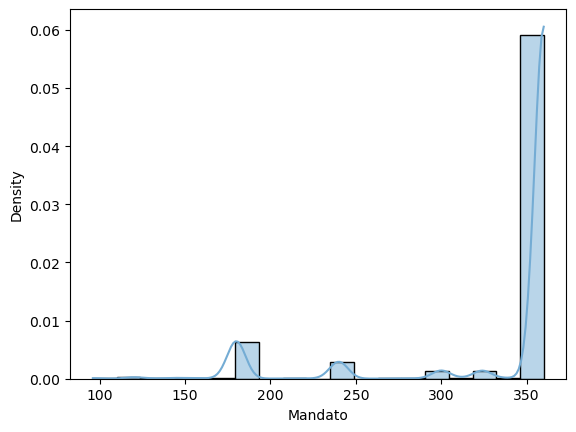

In [58]:
ax = sns.histplot(df_traduzida.Mandato, stat="density", kde=True, color='#74acd4', lw=1)

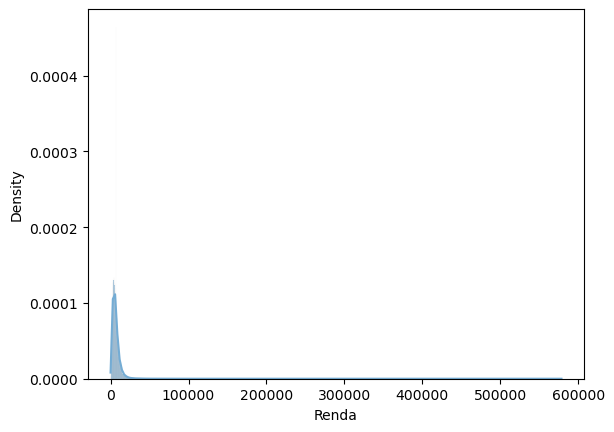

In [59]:
ax = sns.histplot(df_traduzida.Renda, stat="density", kde=True, color='#74acd4', lw=1)

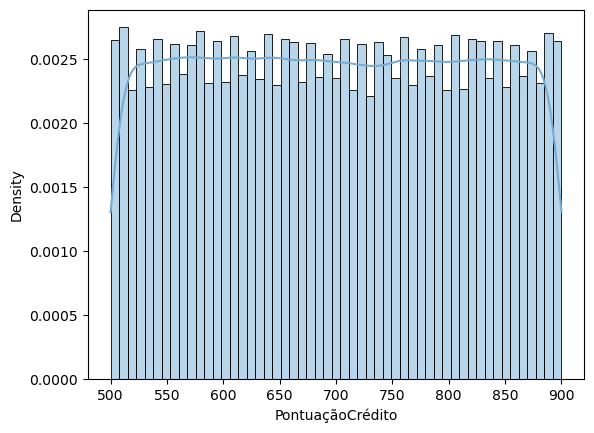

In [60]:
ax = sns.histplot(df_traduzida.PontuaçãoCrédito, stat="density", kde=True, color='#74acd4', lw=1)

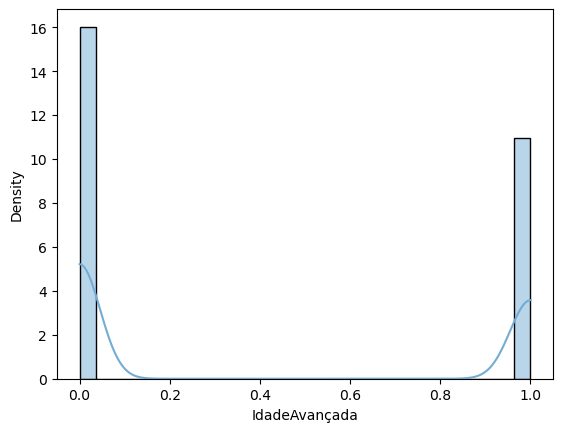

In [61]:
ax = sns.histplot(df_traduzida.IdadeAvançada, stat="density", kde=True, color='#74acd4', lw=1)

### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

In [62]:
# Correlação
# A correção é utilizada para entender como as variaveis se relacionam entre si.
# A correção vai de -1 até +1 onde -1 significa uma forte correção negativa e +1 significa uma forte correlação positiva.
# Correlação NÃO é causalidade, ou seja, uma relação entre as variaveis não significa que uma é a causa do valor da outra.


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df_traduzida.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'ncf'

### Total de valores únicos de cada variável

In [ ]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

## verificação de outliers 

In [ ]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

# ANÁLISE DE DADOS 

In [ ]:
df_traduzida.head(1)

### AGRUPAMENTO DE DADOS


In [ ]:
df_traduzida.groupby(df_traduzida['status']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['LimiteEmpréstimo']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['Sexo']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['EmprestimoFoi']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['TipoEmpréstimo']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['FinalidadeEmpréstimo']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['CapacidadeCrédito']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['CréditoAberto']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['NegócioOuComercial']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['AmortizaçãoNegativa']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['PagamentoÚnico']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['TipoConstrução']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['TipoOcupação']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['Garantidos']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['UnidadesTotal']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['TipoCrédito']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['CréditoRequerente']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['Anos']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['Região']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['TipoSegurança']).size()

In [ ]:
df_traduzida.groupby(df_traduzida['AltosJuros']).size()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = df_traduzida.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = df_traduzida.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = df_traduzida.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = df_traduzida.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= df_traduzida.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = df_traduzida.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= df_traduzida.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = df_traduzida.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = df_traduzida.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = df_traduzida.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = df_traduzida.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= df_traduzida.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = df_traduzida.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= df_traduzida.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO 

In [ ]:
sexo = df_traduzida.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = df_traduzida.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = df_traduzida.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = df_traduzida.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= df_traduzida.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = df_traduzida.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= df_traduzida.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### PLOTANDO EM UM GRAFICO

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="Sexo", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="Garantidos", ax=axes[1][1])


plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="Anos", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="UnidadesTotal", ax=axes[1][1])

plt.show()

## SEPARANDO OS EMPRÉSTIMOS APROVADOS E REPROVADOS 

# APROVADOS -  ANÁLISE DE DADOS

In [ ]:
aprovados = df_traduzida.loc[df_traduzida['status']  == 0]
aprovados.shape

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = aprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = aprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = aprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = aprovados, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = aprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = aprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = aprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = aprovados, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = aprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = aprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = aprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = aprovados, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = aprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = aprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES

In [ ]:
sexo = aprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = aprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = aprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = aprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= aprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = aprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= aprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = aprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = aprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = aprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = aprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= aprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = aprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= aprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO 

In [ ]:
sexo = aprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = aprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = aprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = aprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= aprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = aprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= aprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS APROVADO ABAIXO DE 25 ANOS

In [ ]:
abaixo_25 = aprovados.loc[aprovados['Anos']  == '<25']
abaixo_25.shape

In [ ]:

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25, x="Sexo", ax=axes[0][0])
sns.countplot(data = abaixo_25, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = abaixo_25, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = abaixo_25, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = abaixo_25, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = abaixo_25, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = abaixo_25, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = abaixo_25, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = abaixo_25, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = abaixo_25, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25, x="Anos", ax=axes[1][0])
sns.countplot(data = abaixo_25, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = abaixo_25.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = abaixo_25.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = abaixo_25.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = abaixo_25.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= abaixo_25.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = abaixo_25.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= abaixo_25.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = abaixo_25.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = abaixo_25.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = abaixo_25.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = abaixo_25.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= abaixo_25.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = abaixo_25.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= abaixo_25.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = abaixo_25.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = abaixo_25.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = abaixo_25.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = abaixo_25.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= abaixo_25.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = abaixo_25.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= abaixo_25.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS APROVADO ENTRE 25-34 ANOS

In [ ]:
entre_25_34 = aprovados.loc[aprovados['Anos']  == '25-34']
entre_25_34.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_25_34, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_25_34, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_25_34, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_25_34, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_25_34, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_25_34, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_25_34, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_25_34, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_25_34, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_25_34, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_25_34.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_25_34.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_25_34.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_25_34.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_25_34.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_25_34.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_25_34.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = entre_25_34.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_25_34.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_25_34.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_25_34.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_25_34.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_25_34.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_25_34.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_25_34.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_25_34.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_25_34.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_25_34.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_25_34.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_25_34.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_25_34.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS APROVADO ENTRE 35-44 ANOS

In [ ]:
entre_35_44 = aprovados.loc[aprovados['Anos']  == '35-44']
entre_35_44.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_35_44, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_35_44, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_35_44, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_35_44, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_35_44, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_35_44, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_35_44, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_35_44, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_35_44, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_35_44, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_35_44.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_35_44.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_35_44.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_35_44.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_35_44.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_35_44.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_35_44.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = entre_35_44.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_35_44.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_35_44.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_35_44.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_35_44.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_35_44.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_35_44.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_35_44.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_35_44.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_35_44.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_35_44.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_35_44.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_35_44.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_35_44.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS APROVADO ENTRE 55-64 ANOS

In [ ]:
entre_55_64 = aprovados.loc[aprovados['Anos']  == '55-64']
entre_55_64.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_55_64, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_55_64, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_55_64, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_55_64, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_55_64, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_55_64, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_55_64, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_55_64, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_55_64, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_55_64, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_55_64.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_55_64.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_55_64.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_55_64.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_55_64.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_55_64.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_55_64.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = entre_55_64.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_55_64.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_55_64.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_55_64.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_55_64.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_55_64.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_55_64.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_55_64.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_55_64.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_55_64.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_55_64.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_55_64.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_55_64.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_55_64.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS APROVADO ENTRE 65-74 ANOS

In [ ]:
entre_65_74 = aprovados.loc[aprovados['Anos']  == '65-74']
entre_65_74.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_65_74, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_65_74, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_65_74, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_65_74, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_65_74, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_65_74, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_65_74, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_65_74, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_65_74, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_65_74, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_65_74.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_65_74.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_65_74.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_65_74.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_65_74.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_65_74.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_65_74.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = entre_65_74.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_65_74.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_65_74.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_65_74.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_65_74.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_55_64.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_65_74.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_65_74.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_65_74.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_65_74.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_65_74.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_65_74.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_65_74.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_65_74.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS APROVADO MAIOR DE 74 ANOS

In [ ]:
maior_74 = aprovados.loc[aprovados['Anos']  == '>74']
maior_74.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74, x="Sexo", ax=axes[0][0])
sns.countplot(data = maior_74, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = maior_74, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = maior_74, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = maior_74, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = maior_74, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = maior_74, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = maior_74, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = maior_74, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = maior_74, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74, x="Anos", ax=axes[1][0])
sns.countplot(data = maior_74, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = maior_74.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = maior_74.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = maior_74.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = maior_74.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= maior_74.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = maior_74.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= maior_74.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = maior_74.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = maior_74.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = maior_74.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = maior_74.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= maior_74.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = maior_74.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= maior_74.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = maior_74.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = maior_74.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = maior_74.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = maior_74.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= maior_74.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = maior_74.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= maior_74.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

# REPROVADOS -  ANÁLISE DE DADOS

In [ ]:
reprovados = df_traduzida.loc[df_traduzida['status']  == 1]
reprovados.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = reprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = reprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = reprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = reprovados, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = reprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = reprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = reprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = reprovados, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = reprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = reprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = reprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = reprovados, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = reprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = reprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = reprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = reprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = reprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = reprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= reprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = reprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= reprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = reprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = reprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = reprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = reprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= reprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = reprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= reprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = reprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = reprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = reprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = reprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= reprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = reprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= reprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS REPROVADO ABAIXO DE 25 ANOS

In [ ]:
abaixo_25_reprovados = reprovados.loc[reprovados['Anos']  == '<25']
abaixo_25_reprovados.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25_reprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = abaixo_25_reprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = abaixo_25_reprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = abaixo_25_reprovados, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25_reprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = abaixo_25_reprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = abaixo_25_reprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = abaixo_25_reprovados, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25_reprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = abaixo_25_reprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = abaixo_25_reprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = abaixo_25_reprovados, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = abaixo_25_reprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = abaixo_25_reprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = abaixo_25_reprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = abaixo_25_reprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = abaixo_25_reprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = abaixo_25_reprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= abaixo_25_reprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = abaixo_25_reprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= abaixo_25_reprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS 

In [ ]:
sexo = abaixo_25_reprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = abaixo_25_reprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = abaixo_25_reprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = abaixo_25_reprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= abaixo_25_reprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = abaixo_25_reprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= abaixo_25_reprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = abaixo_25_reprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = abaixo_25_reprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = abaixo_25_reprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = abaixo_25_reprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= abaixo_25_reprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = abaixo_25_reprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= abaixo_25_reprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS REPROVADO ENTRE 25-34 ANOS

In [ ]:
entre_25_34_reprovados = reprovados.loc[reprovados['Anos']  == '25-34']
entre_25_34_reprovados.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34_reprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_25_34_reprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_25_34_reprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_25_34_reprovados, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34_reprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_25_34_reprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_25_34_reprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_25_34_reprovados, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34_reprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_25_34_reprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_25_34_reprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_25_34_reprovados, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_25_34_reprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_25_34_reprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_25_34_reprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_25_34_reprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_25_34_reprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_25_34_reprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_25_34_reprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_25_34_reprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_25_34_reprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS

In [ ]:
sexo = entre_25_34_reprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_25_34_reprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_25_34_reprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_25_34_reprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_25_34_reprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_25_34_reprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_25_34_reprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_25_34_reprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_25_34_reprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_25_34_reprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_25_34_reprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_25_34_reprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = abaixo_25_reprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_25_34_reprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS REPROVADO ENTRE 35-44 ANOS

In [ ]:
entre_35_44_reprovados = reprovados.loc[reprovados['Anos']  == '35-44']
entre_35_44_reprovados.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44_reprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_35_44_reprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_35_44_reprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_35_44_reprovados, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44_reprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_35_44_reprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_35_44_reprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_35_44_reprovados, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44_reprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_35_44_reprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_35_44_reprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_35_44_reprovados, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_35_44_reprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_35_44_reprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_35_44_reprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_35_44_reprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_35_44_reprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_35_44_reprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_35_44_reprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_35_44_reprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_35_44_reprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS

In [ ]:
sexo = entre_35_44_reprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_35_44_reprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_35_44_reprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_35_44_reprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_35_44_reprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_35_44_reprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_35_44_reprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_35_44_reprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_35_44_reprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_35_44_reprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_35_44_reprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_35_44_reprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_35_44_reprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_35_44_reprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS REPROVADO ENTRE 55-64 ANOS

In [ ]:
entre_55_64_reprovados = reprovados.loc[reprovados['Anos']  == '55-64']
entre_55_64_reprovados.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64_reprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_55_64_reprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_55_64_reprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_55_64_reprovados, x="Região", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64_reprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_55_64_reprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_55_64_reprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_55_64_reprovados, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64_reprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_55_64_reprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_55_64_reprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_55_64_reprovados, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_55_64_reprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_55_64_reprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_55_64_reprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_55_64_reprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_55_64_reprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_55_64_reprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_55_64_reprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_55_64_reprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_55_64_reprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS

In [ ]:
sexo = entre_55_64_reprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_55_64_reprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_55_64_reprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_55_64_reprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_55_64_reprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_55_64_reprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_55_64_reprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_55_64_reprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_55_64_reprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_55_64_reprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_35_44_reprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_55_64_reprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_55_64_reprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_55_64_reprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS REPROVADO ENTRE 65-74 ANOS

In [ ]:
entre_65_74_reprovados = reprovados.loc[reprovados['Anos']  == '65-74']
entre_65_74_reprovados.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74_reprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = entre_65_74_reprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_65_74_reprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = entre_65_74_reprovados, x="Região", ax=axes[1][1])

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74_reprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = entre_65_74_reprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = entre_65_74_reprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = entre_65_74_reprovados, x="Garantidos", ax=axes[1][1])

plt.show()

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74_reprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = entre_65_74_reprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = entre_65_74_reprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = entre_65_74_reprovados, x="PagamentoÚnico", ax=axes[1][1])

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = entre_65_74_reprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = entre_65_74_reprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES 

In [ ]:
sexo = entre_65_74_reprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = entre_65_74_reprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_65_74_reprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = entre_65_74_reprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_65_74_reprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_65_74_reprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_65_74_reprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS

In [ ]:
sexo = entre_65_74_reprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = entre_65_74_reprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_65_74_reprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = entre_65_74_reprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_65_74_reprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_65_74_reprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_65_74_reprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = entre_65_74_reprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = entre_65_74_reprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = entre_65_74_reprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = entre_65_74_reprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= entre_65_74_reprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = entre_65_74_reprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= entre_65_74_reprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO AS IDADES DOS EMPRÉSTIMOS REPROVADO MAIOR DE 74 ANOS

In [ ]:
maior_74_reprovados = reprovados.loc[reprovados['Anos']  == '>74']
maior_74_reprovados.shape

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74_reprovados, x="Sexo", ax=axes[0][0])
sns.countplot(data = maior_74_reprovados, x="FinalidadeEmpréstimo", ax=axes[0][1])
sns.countplot(data = maior_74_reprovados, x="TipoCrédito", ax=axes[1][0])
sns.countplot(data = maior_74_reprovados, x="Região", ax=axes[1][1])

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74_reprovados, x="TipoOcupação", ax=axes[0][0])
sns.countplot(data = maior_74_reprovados, x="TipoEmpréstimo", ax=axes[0][1])
sns.countplot(data = maior_74_reprovados, x="LimiteEmpréstimo", ax=axes[1][0])
sns.countplot(data = maior_74_reprovados, x="Garantidos", ax=axes[1][1])

In [ ]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74_reprovados, x="AltosJuros", ax=axes[0][0])
sns.countplot(data = maior_74_reprovados, x="TipoSegurança", ax=axes[0][1])
sns.countplot(data = maior_74_reprovados, x="CréditoRequerente", ax=axes[1][0])
sns.countplot(data = maior_74_reprovados, x="PagamentoÚnico", ax=axes[1][1])


In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = maior_74_reprovados, x="Anos", ax=axes[1][0])
sns.countplot(data = maior_74_reprovados, x="UnidadesTotal", ax=axes[1][1])

plt.show()

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DAS REGIÔES

In [ ]:
sexo = maior_74_reprovados.groupby(["Região"]).count()["status"].rename('QuantidadeRegião')
juros = maior_74_reprovados.groupby(['Região']).sum()['Juros'].rename('SomaJuros')
mediajuros = maior_74_reprovados.groupby(['Região']).mean()['Juros'].rename('MédiaJuros')
renda = maior_74_reprovados.groupby(['Região']).sum()['Renda'].rename('SomaRenda')
mediarenda= maior_74_reprovados.groupby(['Região']).mean()['Renda'].rename('MédiaRenda')
emprestimo = maior_74_reprovados.groupby(['Região']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= maior_74_reprovados.groupby(['Região']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE EMPRÉSTIMOS

In [ ]:
sexo = maior_74_reprovados.groupby(["TipoEmpréstimo"]).count()["status"].rename('QuantidadeRegião')
juros = maior_74_reprovados.groupby(['TipoEmpréstimo']).sum()['Juros'].rename('SomaJuros')
mediajuros = maior_74_reprovados.groupby(['TipoEmpréstimo']).mean()['Juros'].rename('MédiaJuros')
renda = maior_74_reprovados.groupby(['TipoEmpréstimo']).sum()['Renda'].rename('SomaRenda')
mediarenda= maior_74_reprovados.groupby(['TipoEmpréstimo']).mean()['Renda'].rename('MédiaRenda')
emprestimo = maior_74_reprovados.groupby(['TipoEmpréstimo']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= maior_74_reprovados.groupby(['TipoEmpréstimo']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

### ANALISANDO RENDA, EMPRÉSTIMO E JURO DOS TIPOS DE CARTÃO DE CRÉDITO

In [ ]:
sexo = maior_74_reprovados.groupby(["TipoCrédito"]).count()["status"].rename('QuantidadeRegião')
juros = maior_74_reprovados.groupby(['TipoCrédito']).sum()['Juros'].rename('SomaJuros')
mediajuros = maior_74_reprovados.groupby(['TipoCrédito']).mean()['Juros'].rename('MédiaJuros')
renda = maior_74_reprovados.groupby(['TipoCrédito']).sum()['Renda'].rename('SomaRenda')
mediarenda= maior_74_reprovados.groupby(['TipoCrédito']).mean()['Renda'].rename('MédiaRenda')
emprestimo = maior_74_reprovados.groupby(['TipoCrédito']).sum()['ValorEmpréstimo'].rename('SomaEmpréstimo')
mediaemprestimo= maior_74_reprovados.groupby(['TipoCrédito']).mean()['ValorEmpréstimo'].rename('MédiaEmpréstimo')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeRegião":sexo,'SomaJuros':juros,'MédiaJuros':mediajuros,'SomaRenda':renda,'MédiaRenda':mediarenda,'SomaEmpréstimo':emprestimo,'MédiaEmpréstimo':mediaemprestimo})
dados_usuarios ["SomaRenda"] = dados_usuarios["SomaRenda"].map("${:,.2f}".format)
dados_usuarios ["SomaJuros"] = dados_usuarios["SomaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmpréstimo"] = dados_usuarios["MédiaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios ["SomaEmpréstimo"] = dados_usuarios["SomaEmpréstimo"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeRegião", ascending=False).head(5)

# MACHINE LARNING 

## PRÉ-PROCESSAMENTO

In [ ]:
del df_traduzida['CréditoAberto']
del df_traduzida['LimiteEmpréstimo']
del df_traduzida['year']
del df_traduzida['SpreadJuros']
del df_traduzida['Mandato']
del df_traduzida['ValorPropriedade']
del df_traduzida['ltv']
del df_traduzida['SubmissãoCandidatura']
del df_traduzida['Anos']
del df_traduzida['CréditoRequerente']
del df_traduzida['EmprestimoFoi']
del df_traduzida['TipoSegurança']
del df_traduzida['PagamentoÚnico']
del df_traduzida['UnidadesTotal']
del df_traduzida['Garantidos']
del df_traduzida['TipoConstrução']
del df_traduzida['TipoOcupação']
del df_traduzida['FinalidadeEmpréstimo']
del df_traduzida['AmortizaçãoNegativa']

In [ ]:
df_traduzida.info()

In [ ]:
df_traduzida.groupby(df_traduzida['status']).size()

In [ ]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['Sexo'] = lb.fit_transform(df_traduzida['Sexo'])
df_traduzida['TipoEmpréstimo'] = lb.fit_transform(df_traduzida['TipoEmpréstimo'])
df_traduzida['NegócioOuComercial'] = lb.fit_transform(df_traduzida['NegócioOuComercial'])
df_traduzida['TipoCrédito'] = lb.fit_transform(df_traduzida['TipoCrédito'])
df_traduzida['Região'] = lb.fit_transform(df_traduzida['Região'])
df_traduzida['CapacidadeCrédito'] = lb.fit_transform(df_traduzida['CapacidadeCrédito'])
# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [ ]:
df_traduzida.head(1)

In [ ]:
df_traduzida.groupby(df_traduzida['status']).size()

In [ ]:
df_traduzida = df_traduzida[['Sexo','TipoEmpréstimo','CapacidadeCrédito','NegócioOuComercial','ValorEmpréstimo','CobrançasIniciais','Renda','TipoCrédito','PontuaçãoCrédito','Região','AltosJuros','IdadeAvançada','status']]

In [ ]:
# Supondo que 'df_traduzida' seja o DataFrame com seus dados
# Separa X e y
X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

In [ ]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)
# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='Empréstimo aprovado x Empréstimo reprovado',color = ['#1F77B4', '#FF7F0E']);

In [ ]:
X.shape

In [ ]:
X_res.shape

In [ ]:
y.shape

In [ ]:
y_res.shape

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, y)

In [ ]:
# Print dos Resultados
print(df_traduzida.columns[0:12])
print(modelo.feature_importances_)

In [ ]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

In [ ]:
#Random Forest Regressor:
from sklearn.ensemble import RandomForestClassifier
modelo2 = RandomForestClassifier()
modelo2 = modelo2.fit(X_train, y_train)

#Prediction:
y_predito = modelo2.predict(X_test)

In [ ]:
# Avaliando as previsões
accuracy = accuracy_score(y_test, y_predito)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

In [ ]:
# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))



In [ ]:
df_traduzida.head(30)

In [ ]:
Sexo = 3
TipoEmpréstimo = 1
CapacidadeCrédito = 0
NegócioOuComercial = 0
ValorEmpréstimo = 416500
CobrançasIniciais =3224.996127
Renda = 0
TipoCrédito = 2
PontuaçãoCrédito = 652
Região = 3
AltosJuros = 0
IdadeAvançada = 1 

parametro = [[Sexo,TipoEmpréstimo,CapacidadeCrédito,NegócioOuComercial,ValorEmpréstimo,CobrançasIniciais,Renda,TipoCrédito,PontuaçãoCrédito,Região,AltosJuros,IdadeAvançada]]


fazendo_previsao = modelo2.predict(parametro)
probabilidade = modelo2.predict_proba(parametro)


if (fazendo_previsao == 0).any():
    print('EMPRESTIMO APROVADO!')
    print(probabilidade)

else:
    
    print('EMPRESTIMO REJEIRTADO!')
    print(probabilidade)

In [ ]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva_emprestimo.pkl", mode = "wb") 
pickle.dump(modelo2, pickle_out) 
pickle_out.close() 